**AI and Applications M504 assignment**

**GH1017458**

**Sales data analysis for our client based in America who is in electronics business.**

<p>I am working as a Data Scientiest in an American company. My company is in electronics business.
Now my client has the sales data for the previos years in csv. We have to come up with a Exploratory data analysis and answer the below question. </p>
    
- Sales trend.
- Most selling product
- Least selling product and the probable reason 

<p>We are going to use Python libraries, Numpy, Pandas, Matplotlib and sklearn. </p>



[Link to the dataset](https://drive.google.com/file/d/1XxdxY-0Xkdbvbph2qG2rUUVRDmwkDPFp/view?usp=sharing)

**Content**

- Importing Libraries
- Loading Data
- Cleaning Data
- Answering business questions
- Conclusion and Suggestions

**Importing the neccesary libraries and preparing the data**

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime
import calendar
import warnings

#### This is to ignore the warnings 
warnings.filterwarnings("ignore")

**Loading Data**

<p>Before proceeding with any kind of analysis we have to do the following steps:</p>

- Merge the month wise data into a single file/dataframe for ease of use.
- We have to clean our data i.e., find the null values, convert date column to date format etc.


*We are reading only one month data before reading and merging all to check if the path of our file is correctly read*

In [2]:
df=pd.read_csv('./Sales_Data/Sales_April_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


*Now we are looping through all the months files in our source folder and merging the dataframe*

In [3]:
files= [file for file in os.listdir("./Sales_Data")]
all_months_df=pd.DataFrame()
for file in files:
    df=pd.read_csv('./Sales_Data/'+file)
    #merging all months data to a single dataframe for ease of access
    all_months_df = pd.concat([all_months_df,df])

all_months_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


*Now we have to read all months data and write all the merged data to excel file for future analysis*

In [4]:
all_months_df.to_csv("all_months_data.csv",index=False)
all_data_df=pd.read_csv('./all_months_data.csv')
all_data_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


**Cleaning Data**

<p>In this step we have to do the following :</p>

-  find the null values.
-  convert date column to date format.

In [5]:
all_data_df[all_data_df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
69,NaN,NaN,NaN,NaN,NaN,NaN
138,NaN,NaN,NaN,NaN,NaN,NaN
544,NaN,NaN,NaN,NaN,NaN,NaN
546,NaN,NaN,NaN,NaN,NaN,NaN
781,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185723,NaN,NaN,NaN,NaN,NaN,NaN
185750,NaN,NaN,NaN,NaN,NaN,NaN
186271,NaN,NaN,NaN,NaN,NaN,NaN
186758,NaN,NaN,NaN,NaN,NaN,NaN


*Since we have so many NaN in our data, we have to clean this data before proceeding*

In [6]:
all_data_df=all_data_df.dropna(how='all')
all_data_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


In [7]:
IncorrectValues_df=all_data_df[all_data_df["Order Date"].str[0:2]=='Or']
IncorrectValues_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1172,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1620,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1726,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1891,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


*The above data has incorrect values in our date column which has to removed as well. So we find the string 'Or' in the date column and drop the rows.*

In [8]:
all_data_df=all_data_df[all_data_df["Order Date"].str[0:2]!='Or']
all_data_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


---

**Now that our data is clean we will be beginning with our business questions**

<b>Question 1:</b> What was the best month for sales? How much money was earned that month?


<b> Probable solution:</b> We have to find extract the months column from the Order Date. Then we have to group by the month and find sum of sales. Then have to print the sales amount in desc order to find out the max sales month-wise.

*Step 1: Adding month column by extracting it from the order date. We will be grouping our data by this columnn as stated above.*

In [9]:
all_data_df["Month"]=all_data_df["Order Date"].str[0:2]
all_data_df["Month"]=all_data_df["Month"].astype('int32')
all_data_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11


*Step 2: Generating Sales column by multiplying Quantity and Price.*

In [10]:
all_data_df["Sales"]=all_data_df["Quantity Ordered"].astype('float') *all_data_df["Price Each"].astype('float')
all_data_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99


*Step 3: Grouping by Month and finding out sum of sales.*

In [11]:
result=all_data_df.groupby('Month').sum()

result.sort_values('Sales', ascending=False) 

,Sales
Month,
12,4613443.34
10,3736726.88
4,3390670.24
11,3199603.20
5,3152606.75
3,2807100.38
7,2647775.76
6,2577802.26
8,2244467.88


*Step 4: Plotting the result*

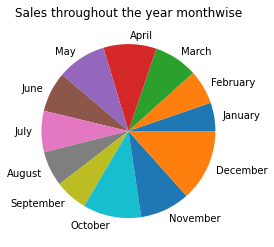

In [12]:
plt.title('Sales throughout the year monthwise')

monthsArr=[]
for month in calendar.month_name[1:]:
    monthsArr.append(month)

plt.pie(result['Sales'],labels=monthsArr)
plt.show()



<b>Answer:</b> The above chart shows that the best sales were in December an it was $4613443.34

---

<b>Question 2</b>: Which city had the highest number of sales?

<b>Probable Solution</b> : We have to extract city  and state from the address and find the unique pair of City,State. Then we have to group by the City name to find the sum of Sales.

*Step 1: We write a function to extract city name from address. Then we call the apply method on the newly added city column and Add city name*

In [13]:
def get_city(address):
    return address.split(',')[1]

all_data_df['City']=all_data_df['Purchase Address'].apply(lambda x: get_city(x))

all_data_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99,New York City
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90,Austin
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99,Seattle
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99,Boston


*Step 2: Now we append State name to City to create unique pair*

In [14]:
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data_df['City']=all_data_df['Purchase Address'].apply(lambda x: get_city(x)+','+ get_state(x))

all_data_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99,"New York City,NY"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90,"Austin,TX"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00,"Los Angeles,CA"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99,"Seattle,WA"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99,"Boston,MA"


*Step 3: Now we group by City and find sum of sales*

In [15]:
result=all_data_df.groupby('City').sum()
result.sort_values('Sales', ascending=False) 

,Month,Sales
City,,
"San Francisco,CA",315520,8262203.91
"Los Angeles,CA",208325,5452570.80
"New York City,NY",175741,4664317.43
"Boston,MA",141112,3661642.01
"Atlanta,GA",104794,2795498.58
"Dallas,TX",104620,2767975.40
"Seattle,WA",104941,2747755.48
"Portland,OR",70621,1870732.34
"Austin,TX",69829,1819581.75


*Step 4: Plotting the result*

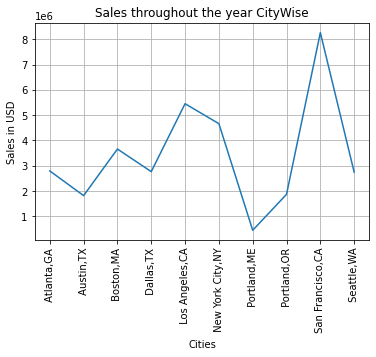

In [16]:
cities=[city for city, df in all_data_df.groupby('City')]
plt.title('Sales throughout the year CityWise')
plt.plot(cities,result['Sales'])
plt.grid()
plt.xticks(cities,rotation='vertical')
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()


<b>Answer</b>: The above chart shows that San Francisco, California had the highest Sales

---

<b> Question 3</b>: Which are the highest selling Products?

<b>Probable Solution</b> : We have to group by Product and apply count method to our data set

*Step 1: We group our data by Product and apply count function.*

In [17]:
result=all_data_df.groupby('Product').count()
result.head(20)

,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
Product,,,,,,,,
20in Monitor,4101,4101,4101,4101,4101,4101,4101,4101
27in 4K Gaming Monitor,6230,6230,6230,6230,6230,6230,6230,6230
27in FHD Monitor,7507,7507,7507,7507,7507,7507,7507,7507
34in Ultrawide Monitor,6181,6181,6181,6181,6181,6181,6181,6181
AA Batteries (4-pack),20577,20577,20577,20577,20577,20577,20577,20577
AAA Batteries (4-pack),20641,20641,20641,20641,20641,20641,20641,20641
Apple Airpods Headphones,15549,15549,15549,15549,15549,15549,15549,15549
Bose SoundSport Headphones,13325,13325,13325,13325,13325,13325,13325,13325
Flatscreen TV,4800,4800,4800,4800,4800,4800,4800,4800


*Step 2: Plot the result*

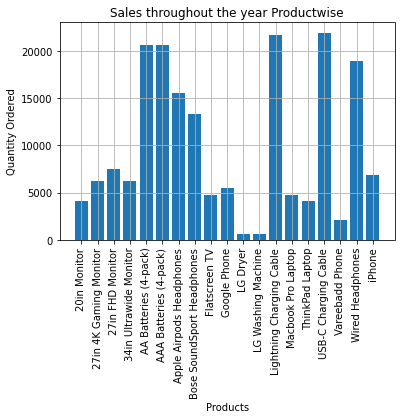

In [18]:
Products=[Product for Product, df in all_data_df.groupby('Product')]
plt.title('Sales throughout the year Productwise')
plt.bar(Products,result['Quantity Ordered'])
plt.grid()
plt.xticks(Products,rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show()



<b>Answer</b>: The above chart shows that USB-C charging cable,Lightning charging cable and AA Batteries, AAA Batteries had the highest Sales

---

<b>Question 4</b>: What is the reason for this Sales pattern?


<b>Probable Solution</b> : For this we have to plot the prices of items with the sales to find out the correlation between them.

*Step 1: We need to convert the Price Each column to numeric to find the average price of each item sold*

In [19]:
all_data_df['Price Each']=pd.to_numeric(all_data_df['Price Each'])

*Step 2: We need to find the average price of each sold*

In [20]:
AvgPrices=all_data_df.groupby('Product').mean()['Price Each']
print(AvgPrices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


*Step 3: We need to plot the prices of the items with the quantity ordered to find the exact correlation*

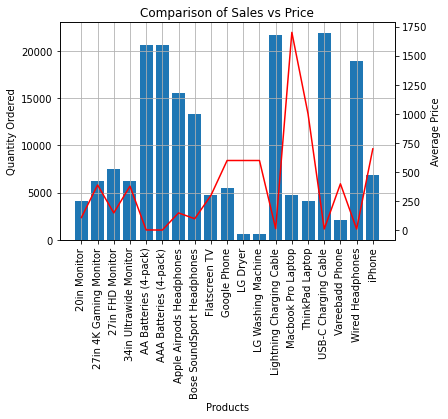

In [21]:
fig,plt1=plt.subplots()

plt2=plt1.twinx()

plt.title('Comparison of Sales vs Price')
plt1.bar(Products,result['Quantity Ordered'])
plt1.grid()
plt1.set_xticklabels(Products,rotation='vertical')
plt1.set_xlabel('Products')
plt1.set_ylabel('Quantity Ordered')

plt2.plot(Products,AvgPrices,color='r')
plt2.set_ylabel('Average Price')


plt.show()

<b>Answer</b>: The above comparison clearly depicts the pattern between the prices of commodities and their sales respectively. The products with lowest prices have the highest sales and vice-versa

---

<b>Question 5</b>: How to increase the sales?


<b>Probable Solution</b> : For this we have to find out what time do people buy products and we should advertise the products/run some offers during those hours

*Step 1: Adding an hour column from the order date column by converting it into date time object and then extracting the hour part*

In [22]:
all_data_df['Order Date']=pd.to_datetime(all_data_df['Order Date'])
all_data_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,278797,Wired Headphones,1,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11,11.99,"New York City,NY"
1,278798,USB-C Charging Cable,2,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",11,23.90,"Austin,TX"
2,278799,Apple Airpods Headphones,1,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",11,150.00,"Los Angeles,CA"
3,278800,27in FHD Monitor,1,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",11,149.99,"Seattle,WA"
4,278801,Bose SoundSport Headphones,1,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",11,99.99,"Boston,MA"


In [23]:
all_data_df['Hour']=all_data_df['Order Date'].dt.hour
all_data_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,278797,Wired Headphones,1,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11,11.99,"New York City,NY",9
1,278798,USB-C Charging Cable,2,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",11,23.90,"Austin,TX",10
2,278799,Apple Airpods Headphones,1,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",11,150.00,"Los Angeles,CA",14
3,278800,27in FHD Monitor,1,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",11,149.99,"Seattle,WA",22
4,278801,Bose SoundSport Headphones,1,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",11,99.99,"Boston,MA",13


*Step 2: Grouping the orders by hour column to find out at which hour do customers place the max orders and plotting the results*

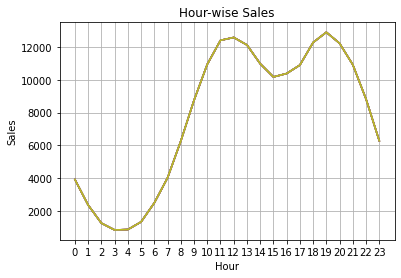

In [24]:
hours=[hour for hour, df in all_data_df.groupby('Hour')]
plt.title('Hour-wise Sales')
plt.plot(hours,all_data_df.groupby('Hour').count())
plt.grid()
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.show()

<b>Answer</b>: The above chart shows that maximum order were placed in two slots, between 11 and 13 hour(11am to 1pm) and between 18 to 20 hour(6pm to 8pm).Therefore to maximise the sales, most of the adverts/offers should be running in between the above two slots.

---

**Conclusion and Suggestions**

<p>From the above report, we can conclude that the sales are the highest in December.This may be due to the fact that people tend to buy more during holiday season. We also see that products which have least price are being sold the most. We also find out that San Francisco, California has the highest sales throughout. This may also be because it is the Silicon Valley of USA and people there have a higher spending capacity. Also the demand of electronics is generally tend to be higher in the silicon valley.</p>
<p>Some business suggestions that I would be providing the marketing team to increase sales would be to run offers during non peak hours as well to increase sales during those hours. They can also offer discounts for some products like MacBook Pro and lenovo laptops to boost their sales.</p>